In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how= "outer", on= "city")
# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
city_data= combined_data.groupby(["city"])

num_rides= city_data[["ride_id"]].count()
num_rides.head()


,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [3]:
total_fare= city_data[["fare"]].sum()
total_fare.head()

,fare
city,
Amandaburgh,443.55
Barajasview,557.31
Barronchester,582.76
Bethanyland,593.21
Bradshawfurt,400.64


In [4]:
total_fare["avg_fare"]= total_fare["fare"] / num_rides["ride_id"]
total_fare.head()

,fare,avg_fare
city,,
Amandaburgh,443.55,24.641667
Barajasview,557.31,25.332273
Barronchester,582.76,36.422500
Bethanyland,593.21,32.956111
Bradshawfurt,400.64,40.064000


In [5]:
city_data_analysis= pd.merge(num_rides, total_fare, how= "outer", on = "city")

city_data_analysis.head()


,ride_id,fare,avg_fare
city,,,
Amandaburgh,18,443.55,24.641667
Barajasview,22,557.31,25.332273
Barronchester,16,582.76,36.422500
Bethanyland,18,593.21,32.956111
Bradshawfurt,10,400.64,40.064000


In [6]:
city_data_df= pd.merge(city_data_analysis, combined_data, how= "outer", on= "city")

city_data_df_final= city_data_df.drop_duplicates("city")

city_data_df_final= city_data_df_final.rename(columns= {"ride_id_x": "Total Rides", "fare_x" : "total fares"})
city_data_df_graph1 = city_data_df_final.drop("total fares", axis= 1)
city_data_df_graph2 = city_data_df_graph1.drop("date", axis= 1)
city_data_df_graph3 = city_data_df_graph2.drop("fare_y", axis= 1)
city_data_df_graph4 = city_data_df_graph3.drop("ride_id_y", axis= 1)

final_graph_df= city_data_df_graph4.set_index("city")
final_graph_df.head()

,Total Rides,avg_fare,driver_count,type
city,,,,
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


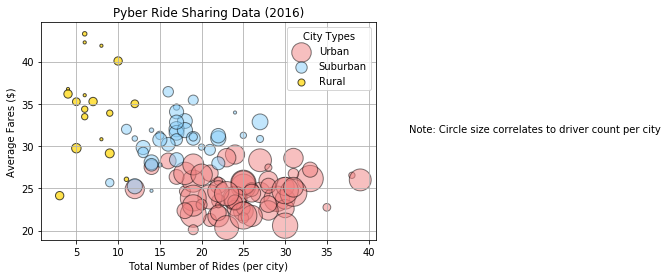

In [7]:
urban= final_graph_df.loc[final_graph_df["type"]== "Urban", :]
rural= final_graph_df.loc[final_graph_df["type"]== "Rural", :]
suburban= final_graph_df.loc[final_graph_df["type"]== "Suburban", :]


# Obtain the x and y coordinates for each of the three city types
x1= urban["Total Rides"]
x2= suburban["Total Rides"]
x3= rural["Total Rides"]

y1= urban["avg_fare"]
y2= suburban["avg_fare"]
y3= rural["avg_fare"]

area1= (10* (urban["driver_count"]))
area2= (10* (suburban["driver_count"]))
area3= (10* (rural["driver_count"]))

plt.scatter(x1, y1, s= area1, color= "lightcoral", alpha= .5, edgecolors= "black", label= "Urban")
plt.scatter(x2, y2, s= area2, color= "lightskyblue", alpha= .5, edgecolors= "black", label= "Suburban")
plt.scatter(x3, y3, s= area3, color= "gold", alpha= .7, edgecolors= "black", label= "Rural")

# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fares ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid(True)
plt.legend()
plt.legend(title= "City Types")
plt.text(75, 32, "Note: Circle size correlates to driver count per city", horizontalalignment= "right", verticalalignment= "center")



plt.savefig("../Images/Pyberscatter.png")

plt.show()


## Total Fares by City Type

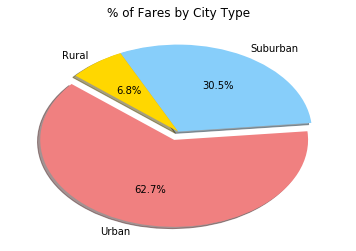

In [8]:
# Calculate Type Percents

total_fares= combined_data["fare"].sum()

type_data= combined_data.groupby(["type"])

type_fares= type_data["fare"].sum()

type_percent= type_fares / total_fares *100

type_percent

# Build Pie Chart
types= ["Urban", "Suburban", "Rural"]
avg_fares= [62.7, 30.5, 6.8]
colors= ["lightcoral", "lightskyblue", "gold"]
explode = (.1, 0, 0)

plt.pie(avg_fares, explode=explode, labels=types, colors=colors,
       shadow=True, startangle=140, autopct="%1.1f%%")

plt.title("% of Fares by City Type")

# Save Figure
plt.savefig("../Images/typefares.png")

In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

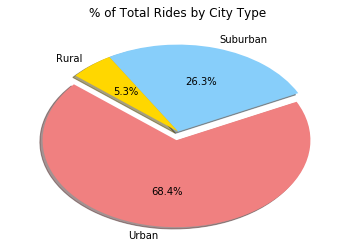

In [10]:
# Calculate Ride Percents
total_rides = combined_data["ride_id"].count()

type_rides = type_data["ride_id"].count()

ride_percent= type_rides / total_rides *100

ride_percent
# Build Pie Chart
types= ["Urban", "Suburban", "Rural"]
avg_rides= [68.4, 26.3, 5.3]
colors= ["lightcoral", "lightskyblue", "gold"]
explode = (.1, 0, 0)

plt.pie(avg_rides, explode=explode, labels=types, colors=colors,
       shadow=True, startangle=140, autopct="%1.1f%%")

plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/typerides.png")

In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

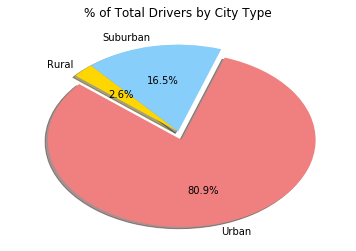

In [12]:
# Calculate Driver Percents
total_drivers= final_graph_df["driver_count"].sum()
    
type_driver =final_graph_df.groupby("type")

drivers= type_driver["driver_count"].sum()

avg_drivers= drivers / total_drivers *100

avg_drivers

types= ["Urban", "Suburban", "Rural"]
drivers_avg = [80.9, 16.5, 2.6]
colors= ["lightcoral", "lightskyblue", "gold"]
explode = (.1, 0, 0)

plt.pie(drivers_avg, explode=explode, labels=types, colors=colors,
       shadow=True, startangle=140, autopct="%1.1f%%")

plt.title("% of Total Drivers by City Type")

plt.savefig("../Images/typedrivers.png")

In [13]:
# Show Figure
plt.show()